# Ensemble Example from SciKit Learn Documentation

### Faz um cross validation de 5 folds para cada um os estimators (logistic regression, random forest, naive bayes, XGBoost e o proprio ensemble) e mostra o accuracy de cada um deles

In [9]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xbg

import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)


iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = xbg.XGBClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('xgb',clf4)], voting='hard')


# Faz um cross validation de 5 folds para cada um dos estimators acima (logistic, random forest, naive e o proprio)
# ensemble e mostra o accuracy de cada um deles
for clf, label in zip([clf1, clf2, clf3, clf4,eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes','XGBoost' ,'Ensemble']):
    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.94 (+/- 0.06) [XGBoost]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


In [10]:
# se eu der um peso como: [8,1,8] por exemplo, o ensemble cai para uns 93% já que dou mais peso
# para o logistic regresseion e a naive bayes, que não tem a performance do random forest
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),('xgb',clf4)], voting='soft',weights=[1,2,1,3])

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'XGBoost', 'Ensemble']):
    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.94 (+/- 0.06) [XGBoost]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


In [11]:
# se eu der um peso como: [8,1,8] por exemplo, o ensemble cai para uns 93% já que dou mais peso
# para o logistic regresseion e a naive bayes, que não tem a performance do random forest
eclf = VotingClassifier(estimators=[ ('rf', clf2), ('xgb',clf4)], voting='soft',weights=[2,4])

for clf, label in zip([ clf2,  clf4, eclf], [ 'Random Forest',  'XGBoost', 'Ensemble']):
    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.94 (+/- 0.06) [XGBoost]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


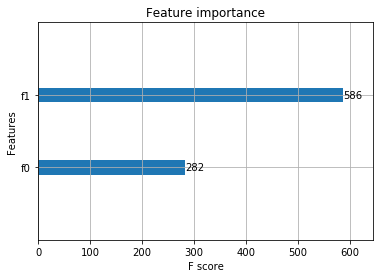

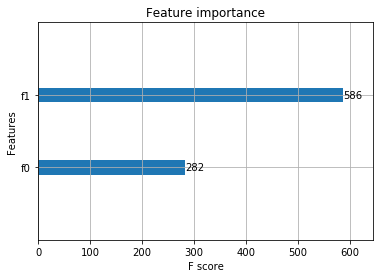

In [15]:
from xgboost import plot_importance
from matplotlib import pyplot

clf4.fit(X,y)
plot_importance(clf4)
pyplot.show()
